# Most Highly Paid Programming Languages

Now let's look at the first question of interest.  That is - What were the top paying programming languages over the past 5 years?

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os.path as op
import urllib.request
from datetime import date
from currency_converter import CurrencyConverter

c = CurrencyConverter(fallback_on_missing_rate=True)
%matplotlib inline

df_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_public.csv')
df_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_public.csv')
df_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_public.csv')
df_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_public.csv')
df_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_public.csv')
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [174]:
# import schemas for each year
# schema_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_schema.csv')
# schema_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_schema.csv')
# schema_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_schema.csv')
# schema_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_schema.csv')
# schema_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_schema.csv')

# for q in range(1,schema_2023.shape[0]):
#     print(str(q) + " " + schema_2023['qname'][q] + "/n"+ schema_2023['question'][q])

# schema_2023.head()

df_2023.columns

df_2023['CurrencyCode'] = df_2023['Currency'].str[:3]

df_2023['CurrencyCode']

0        NaN
1        USD
2        USD
3        USD
4        PHP
        ... 
89179    BRL
89180    NaN
89181    NaN
89182    NaN
89183    IRR
Name: CurrencyCode, Length: 89184, dtype: object

In [175]:
developers = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']
developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]
df_2023_temp = df_2023
df_2023_temp['LanguageHaveWorkedWith'] = df_2023_temp['LanguageHaveWorkedWith'].str.split(';')
# df_2023_temp = df_2023_temp.dropna(subset = ['Currency'], axis=0)
# print(df_2023_temp)
# def GBP_currency_converter(money, currency_in,date):
#    result = []
#    for m, curr in zip(money.items(), currency_in.items()):
#       try:
#          result.append(c.convert(m[1], curr[1], 'GBP', date=date))
#       except:
#          result.append(np.nan)
#          continue
#    return result

# df_2023_temp['CompTotalConverted'] = GBP_currency_converter(df_2023_temp['CompTotal'], df_2023['CurrencyCode'], date(2023, 5, 31))

# df_2023_temp['CompTotalConverted']

# def find_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    return outliers

# df_2023_temp['outliers'] = find_outliers_IQR(df_2023_temp['CompTotalConverted'])
# print(df_2023_temp['outliers'])
# df_2023_temp = df_2023_temp[df_2023_temp['outliers'].isna()]


   LanguageHaveWorkedWith  ConvertedCompYearly
49                    Zig             103611.0
14                 Erlang              99492.5
15                     F#              99311.0
39                   Ruby              98522.0
8                 Clojure              96381.0
13                 Elixir              96381.0
27                   Lisp              96381.0
43                  Scala              96381.0
34                   Perl              94540.0
19                     Go              92760.5
31                  OCaml              91026.0
32            Objective-C              90000.0
16                   Flow              88934.0
40                   Rust              87012.0
45                  Swift              86897.0
20                 Groovy              86271.0
22                Haskell              85672.0
4   Bash/Shell/PowerShell              85000.0
2                    Apex              81552.0
41                    SAS              81000.0
28           

TypeError: unsupported operand type(s) for /: 'str' and 'int'

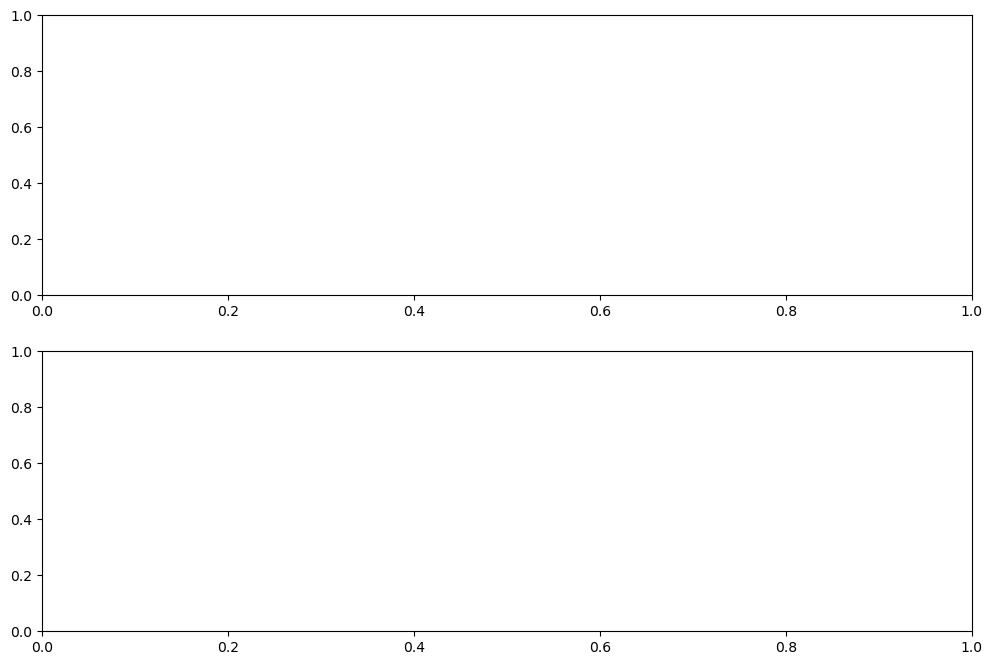

In [176]:
# In this case, we want to look at the languages data for each year
# First - let's just look at the top 10 languages people have worked with  and want to work with in 2023

# drop nas split into list and explode into rows
language_count_23 = df_2023_temp[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})



#count values
language_count_23 = language_count_23.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False)
print(language_count_23)


# bar chart
fig, (ax1, ax2) =  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_23[0:20] * 100 / df_2023.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='paleturquoise', width=0.9, ax=ax1);
ax1.set_title("top 20 languages people have worked with in 2023")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_23 = df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
# count values
language_want_count_23 = language_want_count_23.value_counts()

# bar chart
(language_want_count_23[0:20] * 100 / df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='lightsalmon', width=0.9, ax=ax2);
ax2.set_title("top 20 languages people wanted to work with in 2023")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

# print exact percentages
print("top 5 languages used percentages")
print(language_count_23[0:5] * 100 / df_2023.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0])

print("top 5 languages wanted percentages")
print(language_want_count_23[0:5] * 100 / df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0])


Here we can see that the top 5 languages worked with for 2023 were Javascript 63.9%, HTML/CSS 53.2%, Python 49.5%, SQL 48.9%, TypeScript 39%, the same top languages can be seen within the top languages people wanted to work with with some minor reordering. However this is for the overall participants, but we are interested in professional developers, so lets look at those.

C:\Users\quart\AppData\Local\Temp\ipykernel_10812\1678514990.py:11: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  (language_count_dev_23[0:20] * 100 / developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax3);


IndexError: index 0 is out of bounds for axis 0 with size 0

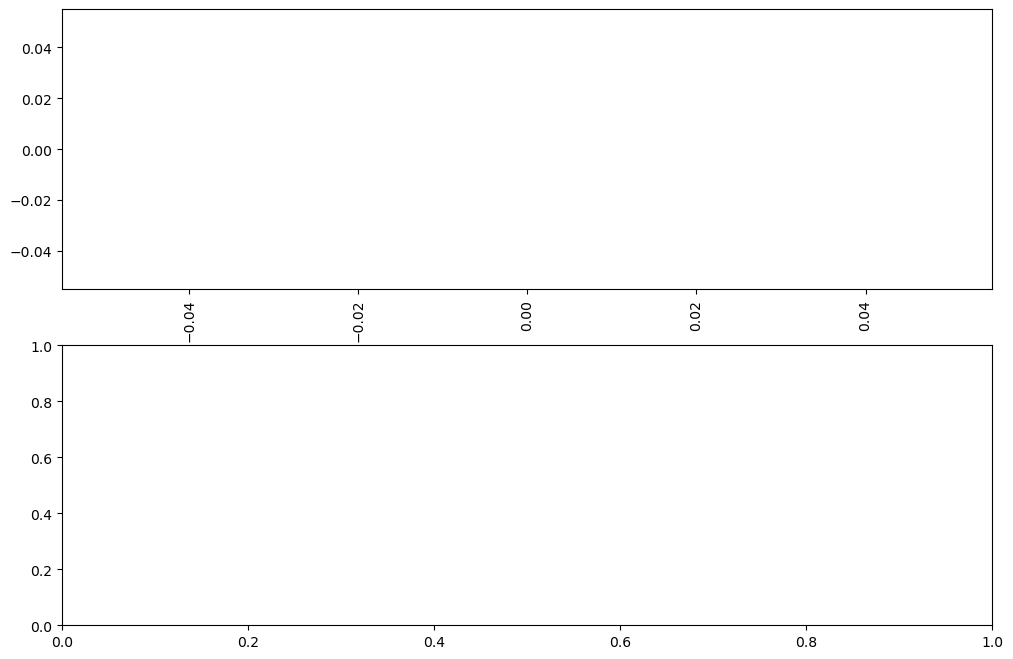

In [ ]:
#create developer only dataframe
developers = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_count_dev_23 = language_count_dev_23.value_counts()

# bar chart
fig, (ax3, ax4) =  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_dev_23[0:20] * 100 / developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax3);
ax3.set_title("top 20 languages developers have worked with in 2023")
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_dev_23 = developers.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
# count values
language_want_count_dev_23 = language_want_count_dev_23.value_counts()

# bar chart
(language_want_count_dev_23[0:20] * 100 / developers.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax4);
ax4.set_title("top 20 languages developers wanted to work with in 2023")
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

# print exact percentages
print("top 5 languages used devs percentages")
print(language_count_dev_23[0:5] * 100 / developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0])

print("top 5 languages wanted devs percentages")
print(language_want_count_dev_23[0:5] * 100 / developers.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0])

Here we can see that the top 5 languages worked with by developers for 2023 were Javascript 65.9%, HTML/CSS 52.9%, SQL 51.6%, Python 45.4%, TypeScript 43.8%, the same top languages can be seen within the top languages people wanted to work with with some minor reordering the same as with the full set of participants. Comparing these results with the full set of participants we can see that SQL has gone up and Python has gone down in the useage ordering and Typescript has gone up and Python dropped down in those that developers want to work with.

In order to answer the full question we need to find the percentages for each languages that were chosen over the past 5 years. as part of this it looks like we will need to combine 'Bash/Shell' and 'PowerShell' for the last couple of years (2012 - 2023)

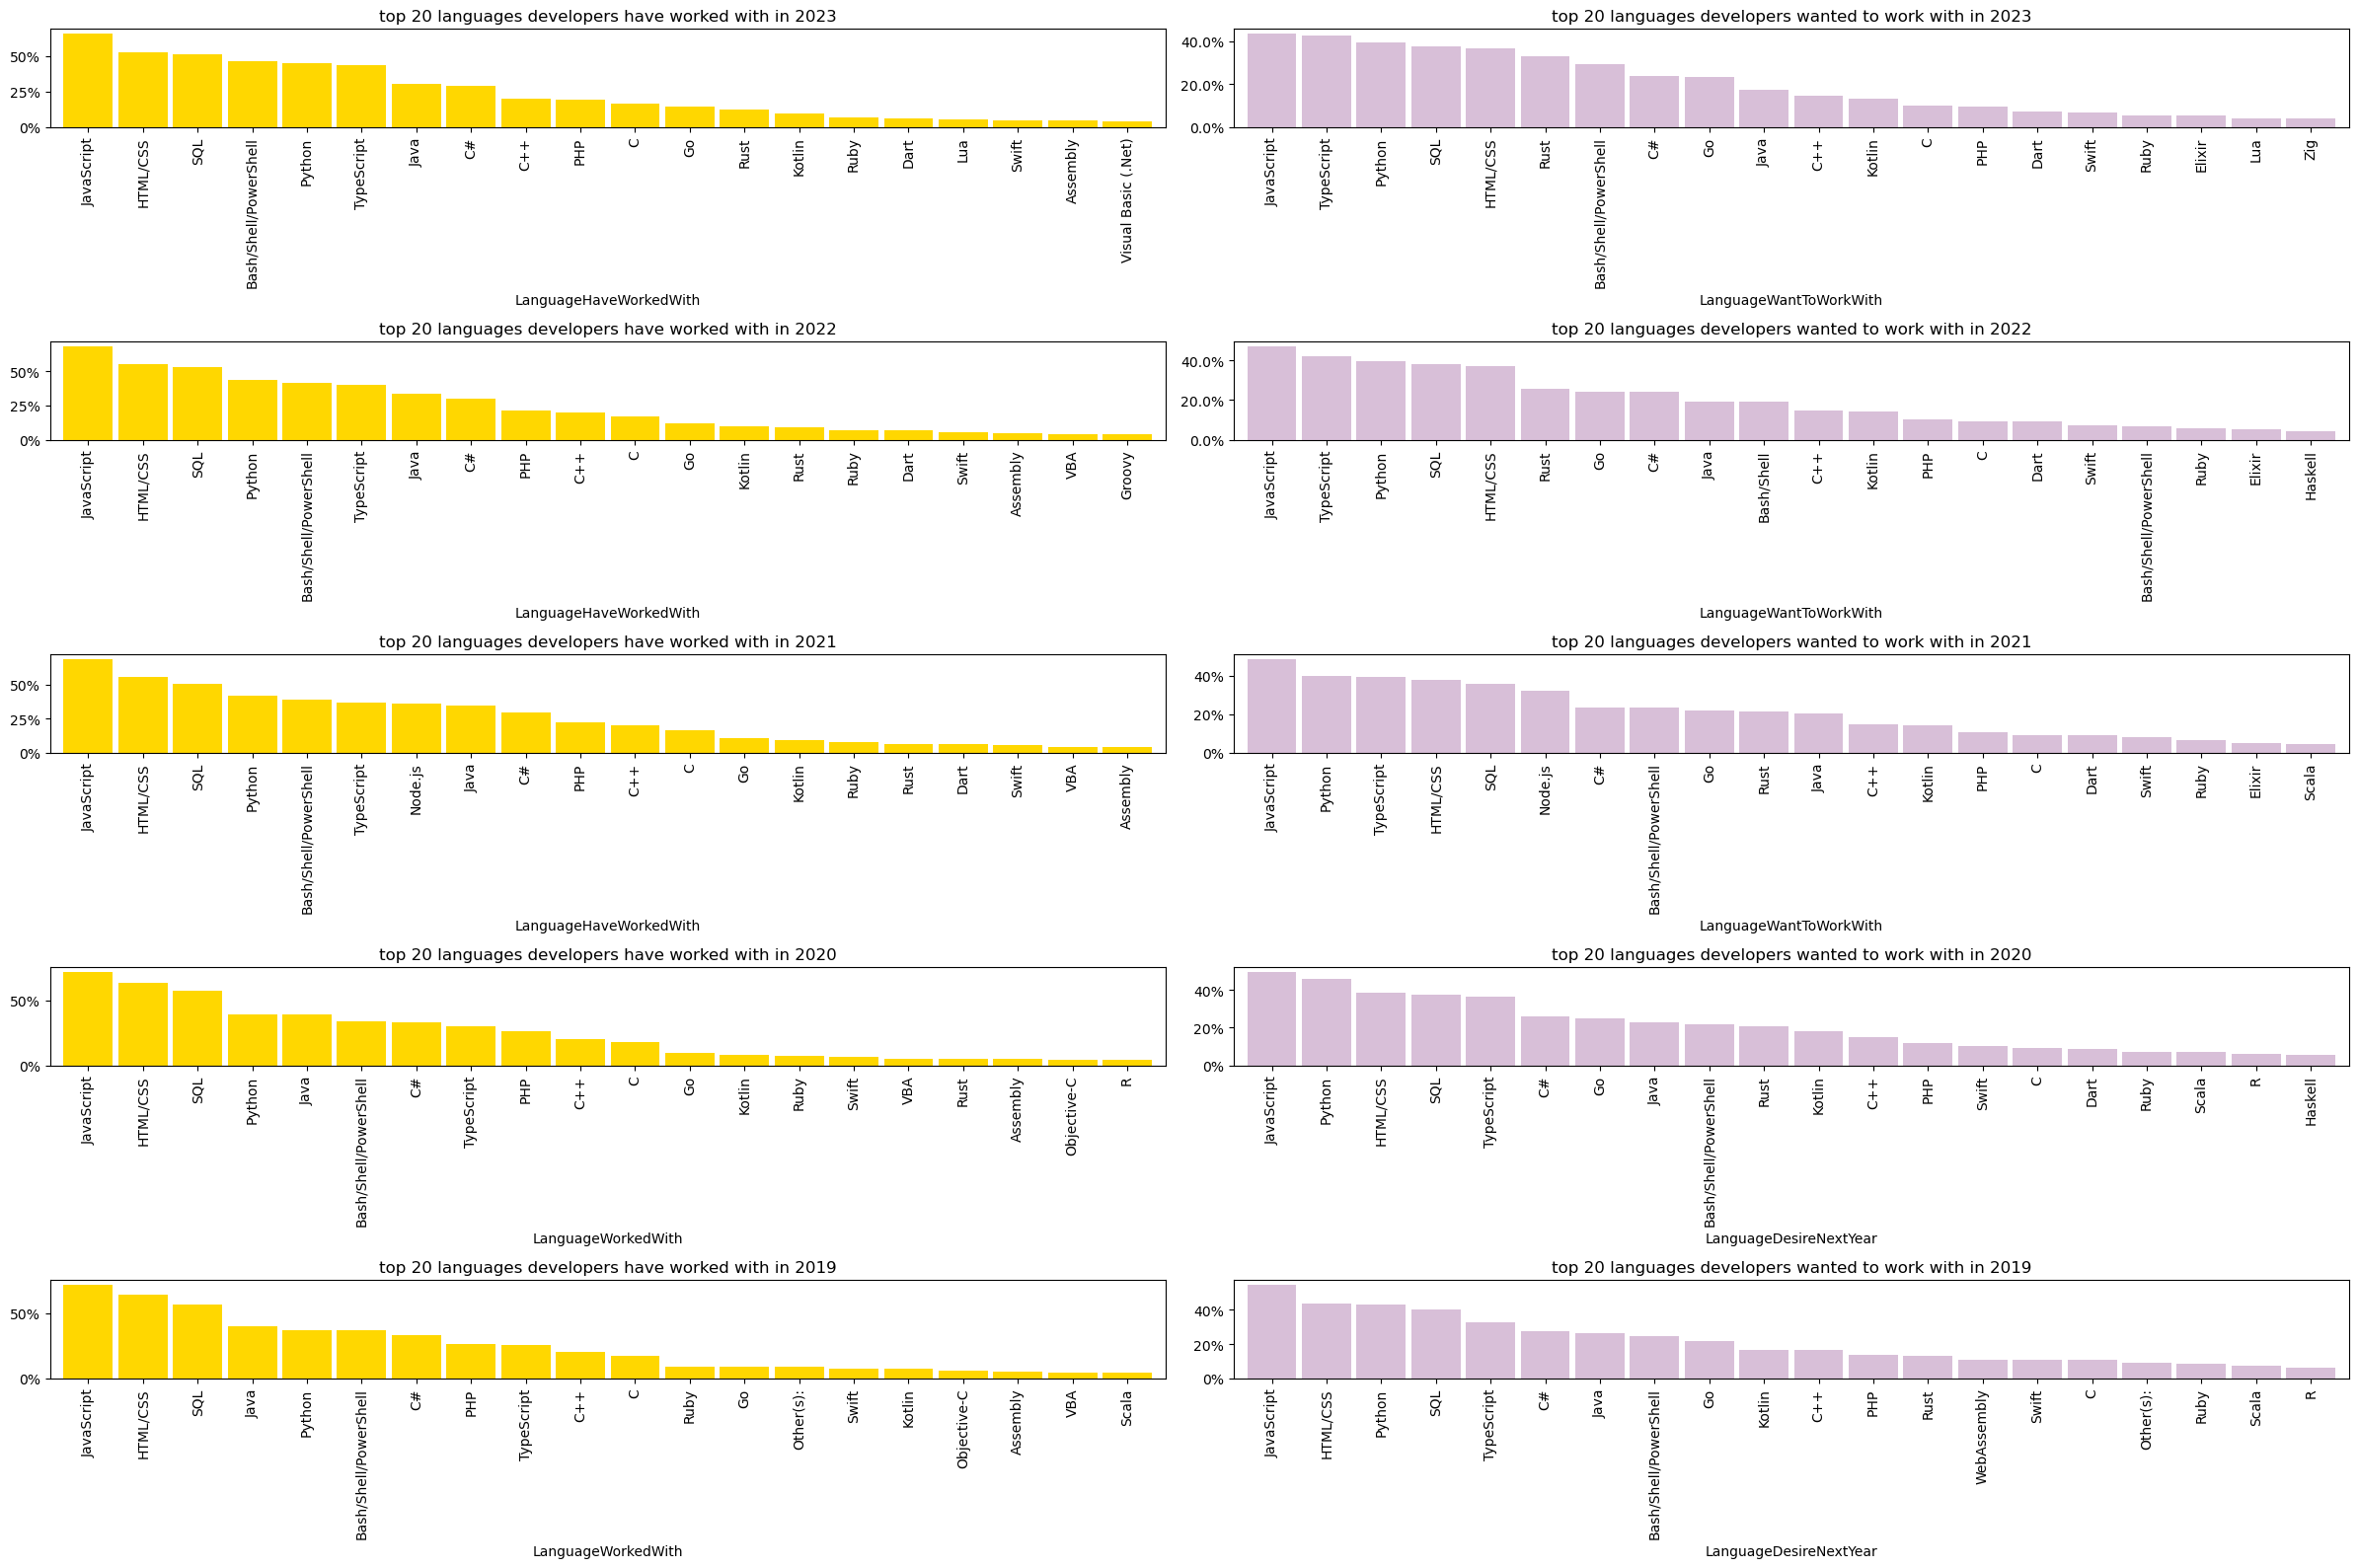

In [ ]:
#create developer only dataframe
developers_23 = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']
developers_22 = df_2022.loc[df_2022['MainBranch'] == 'I am a developer by profession']
developers_21 = df_2021.loc[df_2021['MainBranch'] == 'I am a developer by profession']
developers_20 = df_2020.loc[df_2020['MainBranch'] == 'I am a developer by profession']
developers_19 = df_2019.loc[df_2019['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_22 = developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_21 = developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_20 = developers_20.LanguageWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
language_count_dev_19 = developers_19.LanguageWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_count_dev_23 = language_count_dev_23.value_counts()
language_count_dev_22 = language_count_dev_22.value_counts()
language_count_dev_21 = language_count_dev_21.value_counts()
language_count_dev_20 = language_count_dev_20.value_counts()
language_count_dev_19 = language_count_dev_19.value_counts()

# bar chart
fig, ((ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) =  plt.subplots(5, 2, sharex=False, sharey= False, figsize=(24,16))

# bar chart 1
(language_count_dev_23[0:20] * 100 / developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax5);
ax5.set_title("top 20 languages developers have worked with in 2023")
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 3
(language_count_dev_22[0:20] * 100 / developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax7);
ax7.set_title("top 20 languages developers have worked with in 2022")
ax7.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 5
(language_count_dev_21[0:20] * 100 / developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax9);
ax9.set_title("top 20 languages developers have worked with in 2021")
ax9.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 7
(language_count_dev_20[0:20] * 100 / developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax11);
ax11.set_title("top 20 languages developers have worked with in 2020")
ax11.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 9
(language_count_dev_19[0:20] * 100 / developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax13);
ax13.set_title("top 20 languages developers have worked with in 2019")
ax13.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_dev_23 = developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_22 = developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shel': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_21 = developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_20 = developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_19 = developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_want_count_dev_23 = language_want_count_dev_23.value_counts()
language_want_count_dev_22 = language_want_count_dev_22.value_counts()
language_want_count_dev_21 = language_want_count_dev_21.value_counts()
language_want_count_dev_20 = language_want_count_dev_20.value_counts()
language_want_count_dev_19 = language_want_count_dev_19.value_counts()

# bar chart 2
(language_want_count_dev_23[0:20] * 100 / developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax6);
ax6.set_title("top 20 languages developers wanted to work with in 2023")
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 4
(language_want_count_dev_22[0:20] * 100 / developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax8);
ax8.set_title("top 20 languages developers wanted to work with in 2022")
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 6
(language_want_count_dev_21[0:20] * 100 / developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax10);
ax10.set_title("top 20 languages developers wanted to work with in 2021")
ax10.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 8
(language_want_count_dev_20[0:20] * 100 / developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax12);
ax12.set_title("top 20 languages developers wanted to work with in 2020")
ax12.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 2
(language_want_count_dev_19[0:20] * 100 / developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax14);
ax14.set_title("top 20 languages developers wanted to work with in 2019")
ax14.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

As we can see above the popularity of the top programming languages remain mostly the same with some fluctuations, however the bar charts are not the easiest way to observe these fluctuations so lets look at the changes over time as a lineplot.

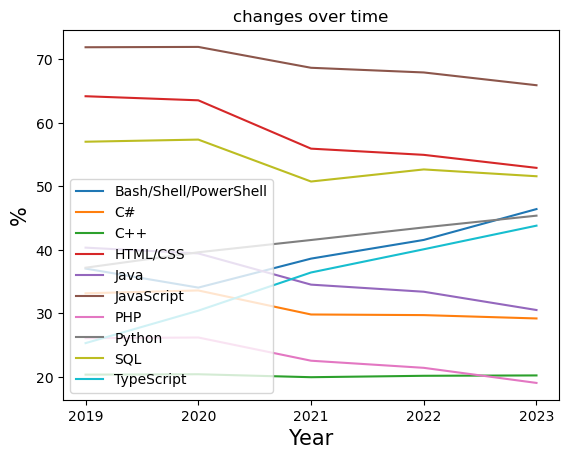

In [ ]:

# Creating a dictionary by passing Series objects as values
frame = {'2019': language_count_dev_19 * 100/ developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0],
         '2020': language_count_dev_20 * 100/ developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0],
         '2021': language_count_dev_21 * 100/ developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0],
         '2022': language_count_dev_22 * 100/ developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0],
         '2023': language_count_dev_23 * 100/ developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]}
 
# Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame).fillna(0)
 
# Printing elements of Dataframe
for i, row in enumerate(result.index):
    if (result.iloc[i].sum() > 100):
        plt.plot(result.columns, result.iloc[i], label=row)


plt.xlabel('Year', fontsize=15)
plt.ylabel('%', fontsize=15)
plt.legend(loc="lower left")
plt.title('changes over time')

plt.show()

So it looks like the top 5 most used programming / scripting languages were JavaScript, which has stayed at number 1 over the past 5 years but lowering in popularity slowly; HTML/CSS, which has remained at number 2 but lowering in popularity; SQL, which has remained at number 3 but lowering in popularity slowly; Bash/Shell/Powershell, has fluctuated between 4  - 6 but it currently increasing in usage and Python which is steadily increasing in popularity and has been either 4/5 over the past 5 years.